### ACF and PACF functions

When working with time series data you have to remember that the data is ordered. This order may or may not contain extra information (think patterns) and often times the ACF (autocorrelation function) and the PACF (partial autocorrelation function) will provide insight into this. 

The ACF is defined as: $r_{y_t, y_{t-1}}$, $r_{y_t, y_{t-2}}$, i.e. it is the correlation between different time lags of the variable with itself. So if there is a correlation between time t and t-12 in monthly data then perhaps there is a yearly trend. 

The PACF is defined as: $Y_t = \alpha_0 + \alpha_1 Y_{t-1} + \alpha_2 Y_{t-2} + \alpha_3 Y_{t-3} + ...$ where the $\alpha$s are the the corresponding lag values. Note that the PACF provides a 'marginal' measure so that the second lag value alread has the first lag value removed. The third value has the first and second value removed. So in this manner any 'chain' relationship(s) are accounted for and not double counted. The following link has a great explanation: [ACF and PACF](https://stats.stackexchange.com/questions/77248/what-is-autocorrelation-function)


In [1]:
import scipy
#print(scipy)
import matplotlib.pyplot as plt
import statsmodels.api as sm
from scipy import stats
import numpy as np
import pandas as pd

%matplotlib inline

import matplotlib as mpl
print("Using matplotlib version {}".format(mpl.__version__))

Using matplotlib version 2.2.2


In [2]:
from pandas.io.parsers import read_csv
root = ""
file_name = "YAHOO-INDEX_GSPC.csv"
df_csv = read_csv(
    root + file_name, 
    header=0, 
    delimiter=",", 
    index_col=0, 
    usecols=[0,6],
    parse_dates=True)
df_csv.tail(4)

,Adjusted Close
Date,
1990-01-05,352.200012
1990-01-04,355.670013
1990-01-03,358.760010
1990-01-02,359.690002


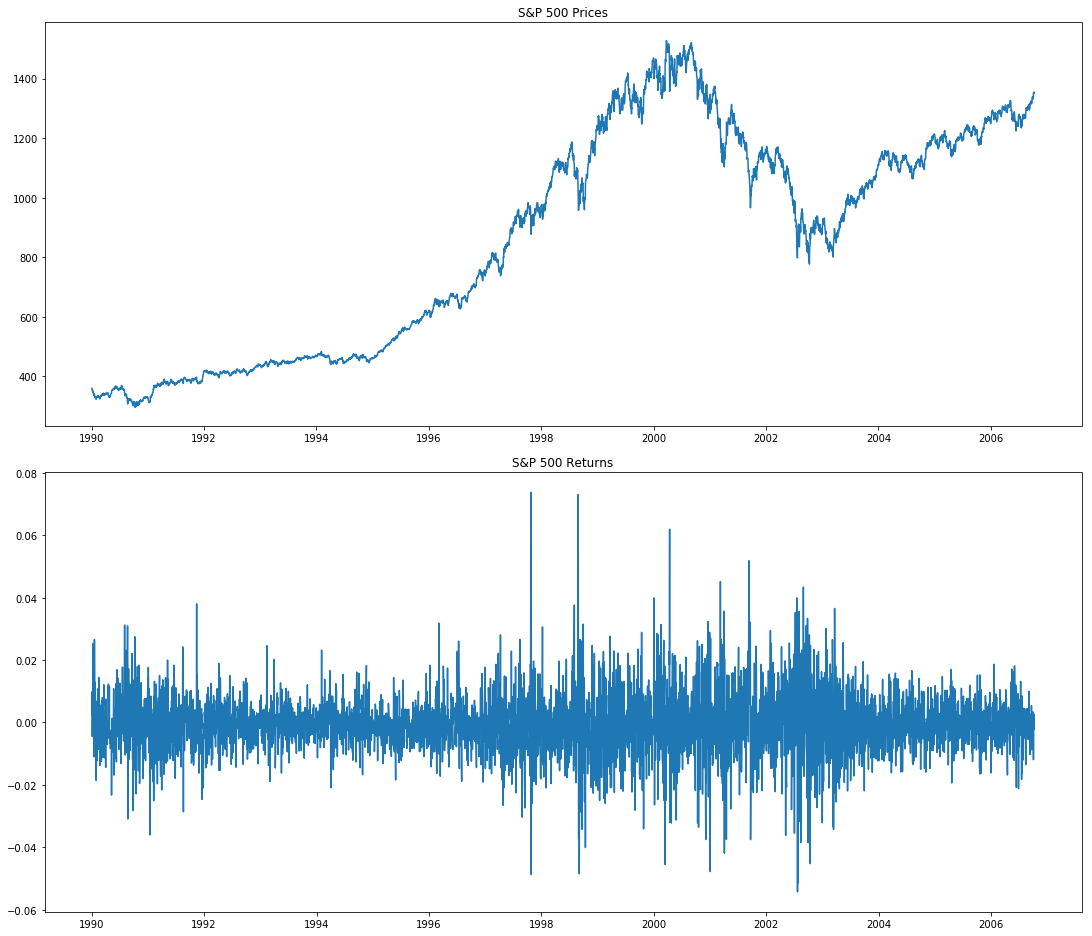

In [3]:
from matplotlib.gridspec import GridSpec

fig1 = plt.figure(figsize=[16,16])
gs = GridSpec(100,100,bottom=0.10,left=0.05,right=0.95)

ax1 = fig1.add_subplot(gs[0:45,:])
# designate ax2 to span all rows, 
ax2 = fig1.add_subplot(gs[50:99,:])

data_values = ax1.plot(df_csv.index, df_csv["Adjusted Close"])
data_returns = ax2.plot(df_csv.index, df_csv[df_csv.columns[0]].pct_change())
ax1.set_title("S&P 500 Prices")
ax2.set_title("S&P 500 Returns")
plt.show()


So you can clearly see a trend in the price level of the S&P 500. And for the most part the S&P 500 returns look like white noise though there is a period of calm between 1992-1996 and a period of higher vol in 1997-2002. What does the ACF/PACF graph tell us?


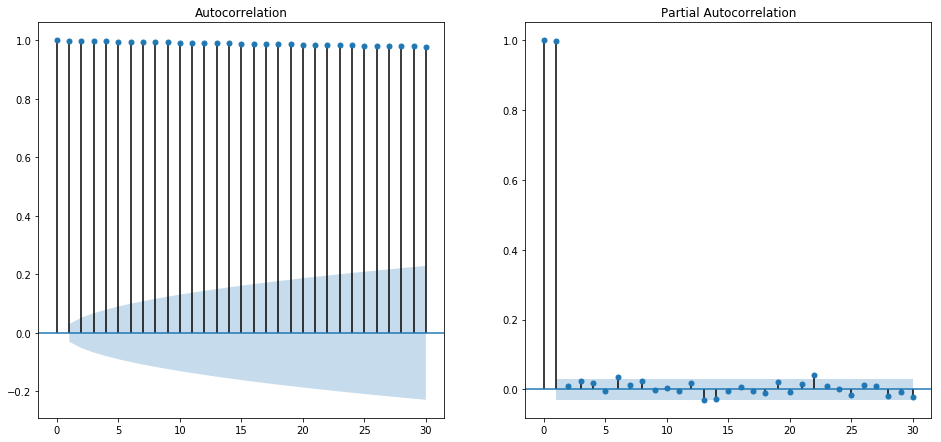

In [4]:
# ACF and PACF on the price level
fig = plt.figure(figsize=[16,16])
ax1 = fig.add_subplot(221)
fig = sm.graphics.tsa.plot_acf(df_csv[df_csv.columns[0]], lags=30, ax=ax1)
ax2 = fig.add_subplot(222)
fig = sm.graphics.tsa.plot_pacf(df_csv[df_csv.columns[0]], lags=30, ax=ax2)


The ACF along with the PACF graphs show that the time series is NOT stationary. In fact, there is a very strong relation between previous price levels as can be seen in the 30 lag ACF. If you wanted to fit a model to this time series data the data needs to be made stationary. Whether it has a deterministic trend or stochastic trend is yet to be seen. 


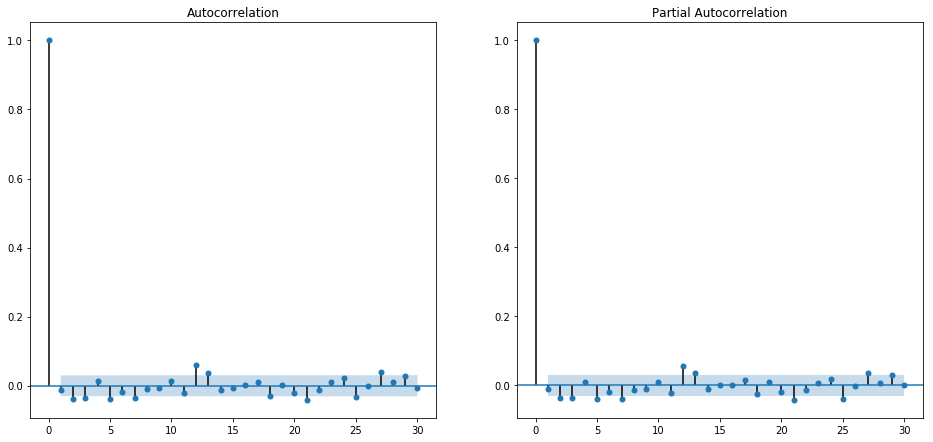

In [5]:
# ACF and PACF on the difference variable 
fig = plt.figure(figsize=[16,16])
ax1 = fig.add_subplot(221)
fig = sm.graphics.tsa.plot_acf(np.diff(df_csv[df_csv.columns[0]]), lags=30, ax=ax1)
ax2 = fig.add_subplot(222)
fig = sm.graphics.tsa.plot_pacf(np.diff(df_csv[df_csv.columns[0]]), lags=30, ax=ax2)

[None, None]

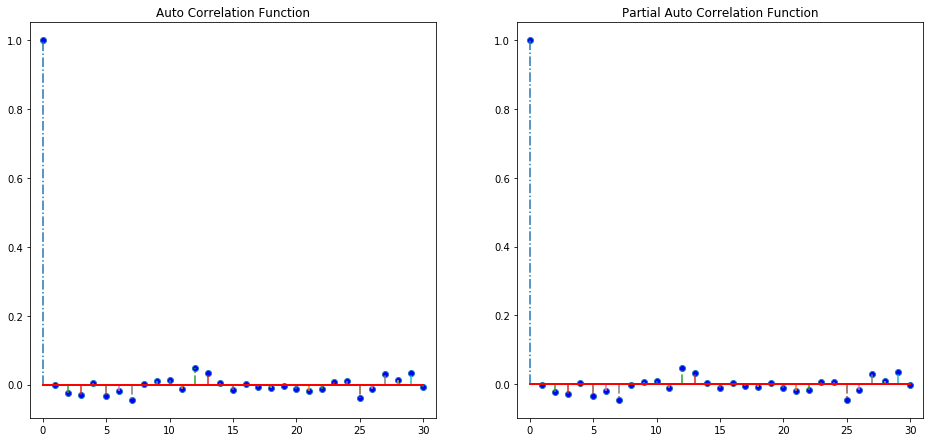

In [6]:
# A second way to generate the ACF/PACF graphs
from statsmodels.tsa.stattools import acf  
from statsmodels.tsa.stattools import pacf
lag_corr = acf(df_csv['Adjusted Close'].pct_change().iloc[1:], nlags=30)
lag_pcorr = pacf(df_csv['Adjusted Close'].pct_change().iloc[1:], nlags=30)

fig = plt.figure(figsize=[16,16])
ax1 = fig.add_subplot(221)
plt.xlim(-1,len(lag_corr))
ax1.set_title("Auto Correlation Function")
markerline, stemlines, baseline = plt.stem(lag_corr, '-.')
plt.setp(markerline, 'markerfacecolor', 'b')
plt.setp(baseline, 'color','r', 'linewidth', 2)

ax2 = fig.add_subplot(222)
plt.xlim(-1,len(lag_pcorr))
#plt.ylim(float("%1.3f" % lag_pcorr.min()), float("%1.3f" % lag_pcorr.min()) * -1)
ax2.set_title("Partial Auto Correlation Function")
markerline, stemlines, baseline = plt.stem(lag_pcorr, '-.')
plt.setp(markerline, 'markerfacecolor', 'b')
plt.setp(baseline, 'color','r', 'linewidth', 2)


The differenced data is stationary as can be seen in the ACF/PACF graph. Basically, if the ACF has a high (.95 or above) 0th lag and many significant slowly decreasing lags, and the PACF has a very significant 1st lag (.95 or above) and no other significant lags, then the variable is NOT stationary; otherwise, the variable is stationary. 

The next step would be to try a deterministic trend fit to the non-differenced data. Admittedly this could have been tried before differencing the data. With financial data you will almost always find out that a deterministic model will not fit the data well. So in the majority of the cases you will have to resort to some sort of ARIMA or GARCH model. 


## Resources

* https://people.duke.edu/~rnau/411arim3.htm
* http://www.johnwittenauer.net/a-simple-time-series-analysis-of-the-sp-500-index/
* http://quant.stackexchange.com/questions/19366/when-measuring-autocorrelation-should-you-use-log-returns-or-prices